In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
from pandas import DataFrame

In [3]:
train_df = pd.read_csv("C:/Users/Dell/Dropbox (Old)/My PC (DESKTOP-9I2HO18)/Downloads/mnist_train_small.csv")

Standardisation = preprocessing.StandardScaler()

In [4]:
def sigmoid(z):
    return (1.0 / (1 + np.exp(-z)))

In [5]:
def tanh(z):
    t=(np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    return t

In [6]:
def dtanh(z):
    t=(np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    dt=1-t**2
    return dt

In [7]:
def relu(z):
    return np.maximum(z, 0)

In [8]:
def derir(z):
    z[z<0] = 0
    z[z>=0] = 1
    return z


In [9]:
num_col=train_df.shape[1]-1

In [10]:
num_row=train_df.shape[0]

In [11]:
x_train=train_df.drop(["6"],axis=1)

In [12]:
x_train=x_train.to_numpy()

x_train=Standardisation.fit_transform(x_train)

In [13]:
x_train=x_train.reshape((num_col,num_row))

In [14]:
x_train.shape

(784, 19999)

In [15]:
y_train=train_df["6"]

In [16]:
y_train=y_train.to_numpy()

In [17]:
y_train=y_train.reshape(1,num_row)

In [18]:
y_train.shape

(1, 19999)

In [19]:
y_train

array([[5, 7, 9, ..., 2, 9, 5]], dtype=int64)

In [20]:
y_com=np.zeros((10,num_row))

In [21]:
for i in range(0,num_row):
    o=y_train[0][i]
    y_com[o][i]=1

In [22]:
class neural_network:
    def __init__(self,x_train,y_com,no_of_iters,learn_rate,a,b):
        self.x_train=x_train
        self.y_com=y_com
        #self.change=number
        self.numrain=no_of_iters
        self.rate=learn_rate
        self.num_row=a
        self.num_col=b
    def training(self):
        w1=(np.random.randn(2*self.num_col,self.num_col))*0.01
        w2=(np.random.randn(2*self.num_col,2*self.num_col))*0.01
        w3=(np.random.randn(10,2*self.num_col))*0.01
        b1=np.random.randn(2*self.num_col,1)
        b2=np.random.randn(2*self.num_col,1)
        b3=np.random.randn(10,1)
        
        
        for i in range(0,self.numrain):
            w3t=np.transpose(w3)
            w2t=np.transpose(w2)
            
            z1=(np.dot(w1,self.x_train))+b1
            a1=relu(z1)
            a1t=np.transpose(a1)
         
            
            z2=(np.dot(w2,a1))+b2
            a2=relu(z2)
            a2t=np.transpose(a2)   
            
            z3=(np.dot(w3,a2))+b3
            a3=sigmoid(z3)
            
            dz3=(a3-self.y_com)
            dw3=(np.dot(dz3,a2t))/self.num_row
            db3=(np.sum(dz3,axis=1,keepdims=True))/self.num_row
            
            dz2=(np.dot(w3t,dz3))*(derir(z2))
            dw2=(np.dot(dz2,a1t))/self.num_row
            db2=(np.sum(dz2,axis=1,keepdims=True))/self.num_row
            
            dz1=(np.dot(w2t,dz2))*(derir(z1))
            dw1=(np.dot(dz1,np.transpose(self.x_train)))/self.num_row
            db1=(np.sum(dz1,axis=1,keepdims=True))/self.num_row
            
            w3=w3-(self.rate*(dw3))
            b3=b3-(self.rate*(db3))
            w2=w2-(self.rate*(dw2))
            b2=b2-(self.rate*(db2))
            w1=w1-(self.rate*(dw1))
            b1=b1-(self.rate*(db1))
            cost=(1/2*self.num_row)*np.sum(np.square(a3-self.y_com))
            plt.scatter(i,cost,c="red")
        w=[w1,w2,w3]
        b=[b1,b2,b3]
        return w,b
            
            
            
            

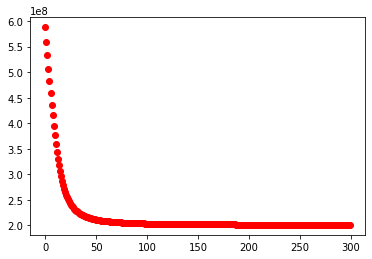

In [23]:
w=neural_network(x_train,y_com,300,0.00001,num_row,num_col).training() 

In [24]:
w1=w[0][0]

In [25]:
w2=w[0][1]

In [26]:
w3=w[0][2]

In [27]:
b1=w[1][0]

In [28]:
b2=w[1][1]

In [29]:
b3=w[1][2]

In [32]:
test_df = pd.read_csv("C:/Users/Dell/Dropbox (Old)/My PC (DESKTOP-9I2HO18)/Downloads/mnist_test.csv")

In [33]:
num_col1=test_df.shape[1]-1

In [34]:
num_row1=test_df.shape[0]

In [35]:
feat1=test_df.drop(["7"],axis=1) 

In [36]:
x_test=feat1.to_numpy()

x_test=Standardisation.fit_transform(x_test)

In [37]:
x_test=x_test.reshape(784,9999)

In [38]:
ydata1=test_df["7"]

In [39]:
y_test=ydata1.to_numpy()
y_test=y_test.astype('int') 

In [40]:
y_test=y_test.reshape(1,num_row1)

In [41]:
def predict():
            
    z1=(np.dot(w1,x_test))+b1
    a1=relu(z1)
    a1t=np.transpose(a1)
         
    z2=(np.dot(w2,a1))+b2
    a2=relu(z2)
    a2t=np.transpose(a2)   
            
    z3=(np.dot(w3,a2))+b3
    a3=sigmoid(z3)
    
    return a3
            
    

In [42]:
a3=predict()
a3             

array([[0.13316615, 0.14225514, 0.08157963, ..., 0.03268231, 0.13534981,
        0.11199177],
       [0.06180004, 0.31150404, 0.25546045, ..., 0.50679208, 0.30082322,
        0.13013552],
       [0.08535319, 0.08730212, 0.10115982, ..., 0.01022162, 0.00228799,
        0.0035988 ],
       ...,
       [0.61343124, 0.44474329, 0.22551226, ..., 0.32205895, 0.78136398,
        0.37412496],
       [0.15348469, 0.22353832, 0.0504236 , ..., 0.49649277, 0.25020312,
        0.22905846],
       [0.02834733, 0.03481607, 0.03679707, ..., 0.01062569, 0.01064951,
        0.01514219]])

In [43]:
y_ans=a3.argmax(axis=0)
y_ans=y_ans.reshape(1,num_row1)


In [44]:
y_ans

array([[7, 7, 6, ..., 1, 7, 7]], dtype=int64)

In [45]:
y_ans.shape

(1, 9999)

In [46]:
y_test.shape

(1, 9999)

In [47]:
count=0
for i in range(0,num_row1):
    if y_test[0][i]==y_ans[0][i]:
        count+=1

In [48]:
accuracy=((count/num_row1)*100)
accuracy

10.34103410341034